# best model이 user에게 추천한 영화들에 대한 EDA

- 당시 가장 높은 성능을 보인 결과 .csv파일에 대해 EDA를 진행했습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import pandas as pd

In [3]:
pd.__version__

'1.4.1'

# 데이터 다운로드

In [4]:
#!wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000176/data/data.tar.gz
#!tar -xf data.tar.gz

In [5]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [6]:
best_df = pd.read_csv('output (1).csv')

# 1. 데이터별 기본정보 (타입, 결측치, 개수 등)

### train_df

In [7]:
train_df.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [8]:
train_df.info() # 모두 int형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [9]:
train_df.isnull().sum() # 결측치 없음

user    0
item    0
time    0
dtype: int64

In [10]:
print('train_df 길이: ', len(train_df)) #5154471
print('user 수: ', train_df['user'].nunique()) #31360
print('시청 item 수: ', train_df['item'].nunique()) #6807

train_df 길이:  5154471
user 수:  31360
시청 item 수:  6807


### title_data

In [11]:
title_data.head()

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [12]:
#title_data.info() #결측치 없음. 데이터 타입 확인

- item 수가 6807개이고 train_df에서 본 nunique한 item 수도 6807로, 리스트에 있는 모든 영화를 적어도 유저들이 한 번씩 보았다. (안 본 영화 없음)

In [13]:
# 중복 제목 영화가 있는지 체크
title_data[title_data['title'].duplicated(keep=False)]

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


- War of the Worlds라는 같은 영화가 3408, 64997이라는 item 넘버링으로 나뉘어져 있다. (차후 수정 방안 고민)

### year_data

In [14]:
year_data.head()

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [15]:
#year_data.info()

In [16]:
print('가장 최근 영화 개봉 년도: ', max(year_data['year']))
print('가장 오래된 영화 개봉 년도: ', min(year_data['year']))
print('평균 영화 개봉 년도: ', np.mean(year_data['year']))

가장 최근 영화 개봉 년도:  2014
가장 오래된 영화 개봉 년도:  1922
평균 영화 개봉 년도:  1992.1747315781734


- year_data의 item은 6799인데 train_df의 nunique한 item수는 6807로 차이가 있다.
> year_data에 없는 영화 항목이 있다.

In [17]:
#year_data에 없는 영화 항목 찾기
train_year_merge = pd.merge(train_df, year_data, how='left', on='item')
train_year_merge[train_year_merge['year'].isnull()].item.value_counts() # 총 1832행

6987      763
3310      480
32898     183
7065      109
7243       78
119145     78
8511       71
6988       70
Name: item, dtype: int64

In [18]:
# title_data의 제목에 개봉년도가 있어서 이를 반영해서 year_data 수정하기
title_data[title_data['item'] == 6987].title.values

array(['Cabinet of Dr. Caligari, The (Cabinet des Dr. Caligari., Das) (1920)'],
      dtype=object)

In [19]:
# 수정 전
print(len(year_data))
print(year_data.tail(10))

6799
        item  year
6789  108928  2014
6790  112370  2014
6791  109846  2014
6792  113225  2014
6793  111743  2014
6794  114795  2014
6795  110771  2014
6796  112804  2014
6797  113378  2014
6798  109850  2014


In [20]:
# 확인하면서
#idx = 6988
#print(title_data[title_data['item'] == idx].title.values)
#print(year_data[year_data['item'] == idx])

In [21]:
# 8개밖에 안되어서 손코딩하기
year_data.loc[6799] = [6987, 1920]
year_data.loc[6800] = [3310, 1921]
year_data.loc[6801] = [32898, 1902]
year_data.loc[6802] = [7065, 1915]
year_data.loc[6803] = [7243, 1916]
year_data.loc[6804] = [119145, 2015]
year_data.loc[6805] = [8511, 1917]
year_data.loc[6806] = [6988, 1919]

In [22]:
# 수정 후 -> 다 채움
print(len(year_data))
print(year_data.tail(10))

6807
        item  year
6797  113378  2014
6798  109850  2014
6799    6987  1920
6800    3310  1921
6801   32898  1902
6802    7065  1915
6803    7243  1916
6804  119145  2015
6805    8511  1917
6806    6988  1919


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1902'),
  Text(1, 0, '1915'),
  Text(2, 0, '1916'),
  Text(3, 0, '1917'),
  Text(4, 0, '1919'),
  Text(5, 0, '1920'),
  Text(6, 0, '1921'),
  Text(7, 0, '1922'),
  Text(8, 0, '1923'),
  Text(9, 0, '1924'),
  Text(10, 0, '1925'),
  Text(11, 0, '1926'),
  Text(12, 0, '1927'),
  Text(13, 0, '1928'),
  Text(14, 0, '1929'),
  Text(15, 0, '1930'),
  Text(16, 0, '1931'),
  Text(17, 0, '1932'),
  Text(18, 0, '1933'),
  

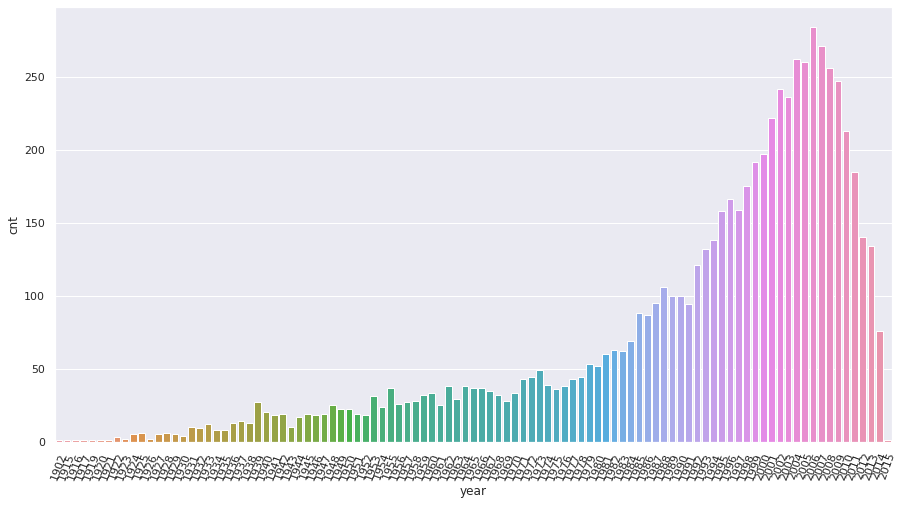

In [23]:
# 개봉 연도별 데이터 시각화
x = pd.DataFrame(year_data.groupby(['year']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='year', y='cnt', data=x)#.barplot()
plt.xticks(rotation=70)

- 2000년 초에 많은 영화가 개봉함을 알 수 있다.

### director_data

In [24]:
director_data.head()

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [25]:
#director_data.info() # 자료형 확인, 결측치 없음, 5905

In [26]:
print('감독 수: ', director_data.director.nunique()) # 1340명의 영화 감독
print('감독 정보가 있는 영화 수: ', len(director_data)) # 5905개의 영화에 감독정보가 있음.

감독 수:  1340
감독 정보가 있는 영화 수:  5905


In [27]:
print('감독별 영화 제작 수 top5')
print(director_data['director'].value_counts().head()) # 최대 44
print('감독별 영화 제작 수 bottom5')
print(director_data['director'].value_counts().tail()) # 최소 2

감독별 영화 제작 수 top5
nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
Name: director, dtype: int64
감독별 영화 제작 수 bottom5
nm0404606    2
nm0405605    2
nm0410139    2
nm0410769    2
nm9054338    2
Name: director, dtype: int64


In [28]:
# 감독 정보가 없는 영화 수
print(title_data.item.nunique() - director_data['item'].nunique()) #1304
print(round((title_data.item.nunique()-director_data['item'].nunique())/len(title_data)*100,2),'%') #19.16%

1304
19.16 %


- 전체 영화 중 감독 정보가 없는 영화는 1304개이고 이는 전체 영화 중에서 약 19.16%를 차지한다.
> 생각보다 많은 비율이다. 모델링 시 감독 정보를 그대로 반영할지, 평균이나 장르별 빈도수가 많은 감독으로 대체할지 등을 고려하자.

### writer_data

In [29]:
writer_data.head()

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [30]:
#writer_data.info() # 자료형 확인, 결측치 없음

In [31]:
print('작가 수: ', writer_data.writer.nunique()) # 2989명의 영화 작가
print('작가 정보가 있는 영화 수: ', len(writer_data)) # 11306개의 영화에 작가 정보가 있음.

작가 수:  2989
작가 정보가 있는 영화 수:  11306


In [32]:
print('작가별 영화 제작 수 top5')
print(writer_data['writer'].value_counts().head()) # 최대 47
print('작가별 영화 제작 수 bottom5')
print(writer_data['writer'].value_counts().tail()) # 최소 2

작가별 영화 제작 수 top5
nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
Name: writer, dtype: int64
작가별 영화 제작 수 bottom5
nm0414893    2
nm0414448    2
nm0414117    2
nm0414047    2
nm5927608    2
Name: writer, dtype: int64


In [33]:
writer_cnt = writer_data['writer'].value_counts()
writer_cnt.describe()

count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: writer, dtype: float64

In [34]:
# 작가 정보가 없는 영화 수
print(title_data.item.nunique() - writer_data['item'].nunique()) #1159
print(round((title_data.item.nunique()-writer_data['item'].nunique())/len(title_data)*100,2),'%') #17.03%

1159
17.03 %


- 전체 영화 중 작가 정보가 없는 영화는 1159개이고, 이는 전체 영화 중에서 약 17.03%를 차지한다.
> 영화 감독 정보와 마찬가지로 생각보다 많은 비율이라고 판단된다. 모델링 시 작가 정보를 그대로 반영할지, 평균이나 장르별 빈도수가 많은 작가로 대체할지 등을 고려하자.

### genre_data

In [35]:
genre_data.head()

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [36]:
#genre_data.info() #자료형 확인, 결측치 없음

In [37]:
genre_data.item.nunique() #모든 영화에 대해 장르 정보가 다 있음.

6807

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


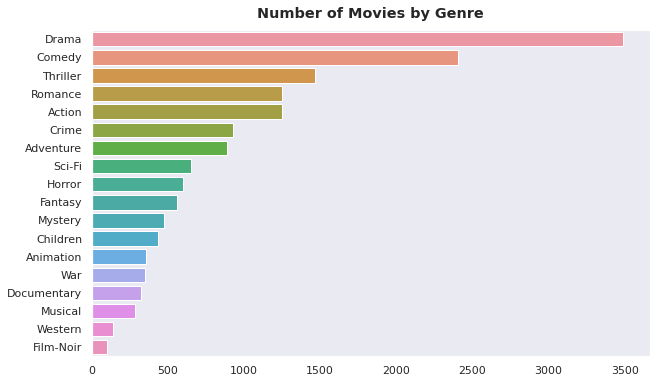

In [38]:
# 장르별 영화 개수 확인 (중복 허용)
num_genre = genre_data['genre'].value_counts()

fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(num_genre.values, num_genre.index, ax=ax)
ax.set_title("Number of Movies by Genre", fontsize="large", fontweight="bold", pad=12)
ax.grid(axis="x")

- Drama가 압도적으로 많다. 한 영화당 여러 장르가 포함되는 중복인걸 감안하면, 웬만한 영화는 Drama에 속한 것으로 보인다.

In [39]:
gen_cnt_all = pd.DataFrame(genre_data.genre.value_counts()/title_data.item.nunique()*100)

In [40]:
gen_cnt_all

,genre
Drama,51.270751
Comedy,35.375349
Thriller,21.536653
Romance,18.378140
Action,18.304686
Crime,13.574262
Adventure,13.089467
Sci-Fi,9.593066
Horror,8.843837
Fantasy,8.182753


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


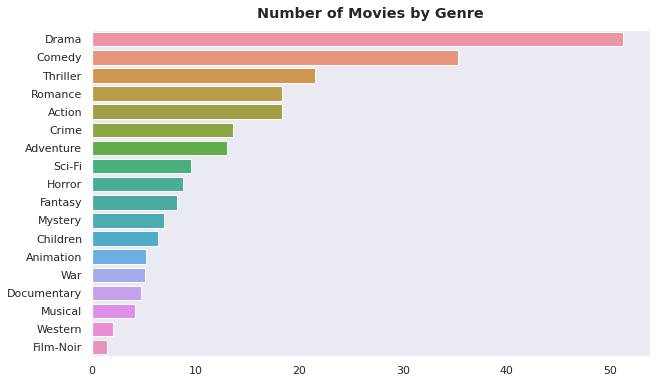

In [41]:
# 더 구체적으로, 전체 영화 개수에서의 각 장르별 영화 개수 비율을 확인해보자.
num_genre = genre_data.genre.value_counts()/title_data.item.nunique()*100
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(num_genre.values, num_genre.index, ax=ax)
ax.set_title("Number of Movies by Genre", fontsize="large", fontweight="bold", pad=12)
ax.grid(axis="x")

- (중복허용 감안하기) 전체 영화의 50% 이상이 Drama 장르에 속하고, 30%이상이 Comedy, 20%이상이 Thriller에 속한다.

## 가장 높은 성능을 보였던 결과(.csv)에 대한 EDA

In [47]:
best_df

,user,item
0,11,4886
1,11,47
2,11,37386
3,11,32587
4,11,1831
...,...,...
313595,138493,2628
313596,138493,589
313597,138493,32587
313598,138493,163


In [43]:
best_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313600 entries, 0 to 313599
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    313600 non-null  int64
 1   item    313600 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


In [66]:
tuple(best_df[best_df['user'] == 11]['item'])

(4886, 47, 37386, 32587, 1831, 8961, 37729, 8861, 4370, 3354)

In [70]:
best_np = np.array(best_df)

In [71]:
best_np

array([[    11,   4886],
       [    11,     47],
       [    11,  37386],
       ...,
       [138493,  32587],
       [138493,    163],
       [138493,   1281]])

In [79]:
best_np[best_np[:,0] == 11][:,1]

array([ 4886,    47, 37386, 32587,  1831,  8961, 37729,  8861,  4370,
        3354])

In [113]:
best_rec = []
best_item = []
i = 0
for user, item in best_np:
    if i%10 == 0:
        best_item.append(best_np[best_np[:,0] == user][:,1])
        best_rec.append(user)
        #print(f"user : {user} || {best_rec[user]}")
    i+=1

In [ ]:
print(best_rec)
print(best_item)

In [115]:
best_user_item_df = pd.DataFrame(data = best_item ,index=best_rec, columns=range(10))
#best_user_item_df['user'] = best_rec.keys()
#best_user_item_df['item'] = best_rec.values()
best_user_item_df

,0,1,2,3,4,5,6,7,8,9
11,4886,47,37386,32587,1831,8961,37729,8861,4370,3354
14,1223,1035,5444,4857,2424,1907,914,3034,4016,1198
18,63082,27727,5995,46723,1193,296,4235,46578,2360,4226
25,1270,47,2997,608,2329,1259,597,1073,1,4226
31,7454,5313,8636,8644,6377,34405,68358,5882,8360,68954
...,...,...,...,...,...,...,...,...,...,...
138473,593,356,48394,778,318,7361,8950,1258,5952,6502
138475,930,4432,6254,5017,2203,1945,6985,3307,8491,8125
138486,2710,2959,5679,2571,1200,589,110,8957,1214,6539
138492,4226,2918,608,1265,3421,296,2395,3897,318,2502


In [126]:
best_user_item_df.index

Int64Index([    11,     14,     18,     25,     31,     35,     43,     50,
                58,     60,
            ...
            138459, 138461, 138470, 138471, 138472, 138473, 138475, 138486,
            138492, 138493],
           dtype='int64', length=31360)

In [118]:
best_user_item_df.loc[11]


0     4886
1       47
2    37386
3    32587
4     1831
5     8961
6    37729
7     8861
8     4370
9     3354
Name: 11, dtype: int64

In [125]:
for i in list(best_user_item_df.loc[11]):
    print(list(genre_data[genre_data['item'] == i]['genre']))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']
['Mystery', 'Thriller']
['Action', 'Sci-Fi']
['Action', 'Crime', 'Film-Noir', 'Mystery', 'Thriller']
['Action', 'Adventure', 'Sci-Fi']
['Action', 'Adventure', 'Animation', 'Children', 'Comedy']
['Animation', 'Comedy', 'Fantasy', 'Musical', 'Romance']
['Action', 'Horror', 'Sci-Fi', 'Thriller']
['Adventure', 'Drama', 'Sci-Fi']
['Sci-Fi']


In [133]:
i = 0
listgen = []
for user in best_user_item_df.index:
    #if i == 50:
    #    break
    temp = []
    for item in list(best_user_item_df.loc[user]):
        temp.extend(list(genre_data[genre_data['item'] == item]['genre']))
    #best_user_item_df.loc[user]['genre'] = temp
    listgen.append(temp)
    #i+=1
#listgen

In [145]:
list(year_data[year_data['item'] == 1348]['year'])

[1922]

In [152]:
listyear = []
for user in best_user_item_df.index:
    #if i == 50:
    #    break
    tempy = []
    for item in list(best_user_item_df.loc[user]):
        tempy.extend(list(year_data[year_data['item'] == item]['year']))
    #best_user_item_df.loc[user]['genre'] = temp
    listyear.append(tempy)

In [167]:
listtitle = []
for user in best_user_item_df.index:
    #if i == 50:
    #    break
    tempt = []
    for item in list(best_user_item_df.loc[user]):
        tempt.extend(list(title_data[title_data['item'] == item]['title']))
    #best_user_item_df.loc[user]['genre'] = temp
    listtitle.append(tempt)

In [134]:
best_user_item_df['genre'] = listgen

In [153]:
best_user_item_df['year'] = listyear

In [168]:
best_user_item_df['title'] = listtitle

In [169]:
best_user_item_df

,0,1,2,3,4,5,6,7,8,9,genre,year,title
11,4886,47,37386,32587,1831,8961,37729,8861,4370,3354,"[Adventure, Animation, Children, Comedy, Fanta...","[2001, 1995, 2005, 2005, 1998, 2004, 2005, 200...","[Monsters, Inc. (2001), Seven (a.k.a. Se7en) (..."
14,1223,1035,5444,4857,2424,1907,914,3034,4016,1198,"[Adventure, Animation, Children, Comedy, Sci-F...","[1989, 1965, 2002, 1971, 1998, 1998, 1964, 197...","[Grand Day Out with Wallace and Gromit, A (198..."
18,63082,27727,5995,46723,1193,296,4235,46578,2360,4226,"[Crime, Drama, Romance, Drama, Romance, Drama,...","[2008, 2004, 2002, 2006, 1975, 1994, 2000, 200...","[Slumdog Millionaire (2008), Head-On (Gegen di..."
25,1270,47,2997,608,2329,1259,597,1073,1,4226,"[Adventure, Comedy, Sci-Fi, Mystery, Thriller,...","[1985, 1995, 1999, 1996, 1998, 1986, 1990, 197...","[Back to the Future (1985), Seven (a.k.a. Se7e..."
31,7454,5313,8636,8644,6377,34405,68358,5882,8360,68954,"[Action, Adventure, Fantasy, Horror, Action, A...","[2004, 2002, 2004, 2004, 2003, 2005, 2009, 200...","[Van Helsing (2004), Scorpion King, The (2002)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138473,593,356,48394,778,318,7361,8950,1258,5952,6502,"[Crime, Horror, Thriller, Comedy, Drama, Roman...","[1991, 1994, 2006, 1996, 1994, 2004, 2004, 198...","[Silence of the Lambs, The (1991), Forrest Gum..."
138475,930,4432,6254,5017,2203,1945,6985,3307,8491,8125,"[Film-Noir, Romance, Thriller, Drama, Film-Noi...","[1946, 1957, 1937, 1953, 1943, 1954, 1928, 193...","[Notorious (1946), Sweet Smell of Success (195..."
138486,2710,2959,5679,2571,1200,589,110,8957,1214,6539,"[Drama, Horror, Thriller, Action, Crime, Drama...","[1999, 1999, 2002, 1999, 1986, 1991, 1995, 200...","[Blair Witch Project, The (1999), Fight Club (..."
138492,4226,2918,608,1265,3421,296,2395,3897,318,2502,"[Mystery, Thriller, Comedy, Comedy, Crime, Dra...","[2000, 1986, 1996, 1993, 1978, 1994, 1998, 200...","[Memento (2000), Ferris Bueller's Day Off (198..."


In [170]:
best_user_genre = best_user_item_df.drop([0,1,2,3,4,5,6,7,8,9,'year', 'title'],axis=1)

In [171]:
best_user_year = best_user_item_df.drop([0,1,2,3,4,5,6,7,8,9,'genre', 'title'],axis=1)

In [172]:
best_user_title = best_user_item_df.drop([0,1,2,3,4,5,6,7,8,9,'genre', 'year'],axis=1)

In [173]:
best_user_genre

,genre
11,"[Adventure, Animation, Children, Comedy, Fanta..."
14,"[Adventure, Animation, Children, Comedy, Sci-F..."
18,"[Crime, Drama, Romance, Drama, Romance, Drama,..."
25,"[Adventure, Comedy, Sci-Fi, Mystery, Thriller,..."
31,"[Action, Adventure, Fantasy, Horror, Action, A..."
...,...
138473,"[Crime, Horror, Thriller, Comedy, Drama, Roman..."
138475,"[Film-Noir, Romance, Thriller, Drama, Film-Noi..."
138486,"[Drama, Horror, Thriller, Action, Crime, Drama..."
138492,"[Mystery, Thriller, Comedy, Comedy, Crime, Dra..."


In [166]:
best_user_genre['genre'].value_counts

<bound method IndexOpsMixin.value_counts of 11        [Adventure, Animation, Children, Comedy, Fanta...
14        [Adventure, Animation, Children, Comedy, Sci-F...
18        [Crime, Drama, Romance, Drama, Romance, Drama,...
25        [Adventure, Comedy, Sci-Fi, Mystery, Thriller,...
31        [Action, Adventure, Fantasy, Horror, Action, A...
                                ...                        
138473    [Crime, Horror, Thriller, Comedy, Drama, Roman...
138475    [Film-Noir, Romance, Thriller, Drama, Film-Noi...
138486    [Drama, Horror, Thriller, Action, Crime, Drama...
138492    [Mystery, Thriller, Comedy, Comedy, Crime, Dra...
138493    [Mystery, Sci-Fi, Thriller, Adventure, Animati...
Name: genre, Length: 31360, dtype: object>

In [184]:
best_user_genre.loc[11].values[0].count('Action')

5

In [181]:
import collections
dict= {}
dict = collections.Counter(best_user_genre.loc[11].values[0])
print(dict)

Counter({'Action': 5, 'Sci-Fi': 5, 'Adventure': 4, 'Animation': 3, 'Comedy': 3, 'Thriller': 3, 'Children': 2, 'Fantasy': 2, 'Mystery': 2, 'Crime': 1, 'Film-Noir': 1, 'Musical': 1, 'Romance': 1, 'Horror': 1, 'Drama': 1})


In [185]:
gencount = []
for user in best_user_item_df.index:
    temp = []
    for gen in gen_cnt_all.index:#list(best_user_genre.loc[user].values[0]):
        temp.append(best_user_genre.loc[user].values[0].count(gen))
    gencount.append(temp)


## userID < 1000 인 user들에게 추천된 영화들의 장르

In [186]:
best_user_genre_rec = pd.DataFrame(data = gencount ,index=best_user_genre.index, columns= gen_cnt_all.index)

In [187]:
best_user_genre_rec

,Drama,Comedy,Thriller,Romance,Action,Crime,Adventure,Sci-Fi,Horror,Fantasy,Mystery,Children,Animation,War,Documentary,Musical,Western,Film-Noir
11,1,3,3,1,5,1,4,5,1,2,2,2,3,0,0,1,0,1
14,3,6,0,4,1,0,6,2,0,1,0,5,5,0,0,5,0,0
18,9,2,4,2,0,2,1,0,0,0,1,0,0,1,0,0,0,0
25,4,6,3,1,0,2,3,1,0,3,2,2,1,0,0,1,0,0
31,1,2,1,1,6,0,10,5,1,2,0,4,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138473,5,2,3,2,1,3,1,2,3,2,1,0,0,1,0,0,0,0
138475,8,2,2,4,0,3,0,0,0,0,0,0,0,0,0,0,0,4
138486,3,1,5,0,6,1,2,4,5,1,2,0,0,1,0,0,0,0
138492,5,7,3,1,0,4,0,0,0,1,1,0,0,0,0,0,0,0


In [215]:
best_user_genre_rec_1000 = best_user_genre_rec.loc[best_user_genre_rec.index < 1000]

In [216]:
best_user_genre_rec_1000

,Drama,Comedy,Thriller,Romance,Action,Crime,Adventure,Sci-Fi,Horror,Fantasy,Mystery,Children,Animation,War,Documentary,Musical,Western,Film-Noir
11,1,3,3,1,5,1,4,5,1,2,2,2,3,0,0,1,0,1
14,3,6,0,4,1,0,6,2,0,1,0,5,5,0,0,5,0,0
18,9,2,4,2,0,2,1,0,0,0,1,0,0,1,0,0,0,0
25,4,6,3,1,0,2,3,1,0,3,2,2,1,0,0,1,0,0
31,1,2,1,1,6,0,10,5,1,2,0,4,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,2,2,5,2,8,2,4,3,0,1,1,0,0,0,0,0,0,0
990,3,3,2,0,4,1,5,4,0,2,1,1,1,1,0,0,0,0
994,9,2,1,2,1,2,1,1,0,0,2,0,0,1,1,0,0,0
995,2,3,2,0,6,2,7,3,0,5,1,1,2,0,0,0,0,1


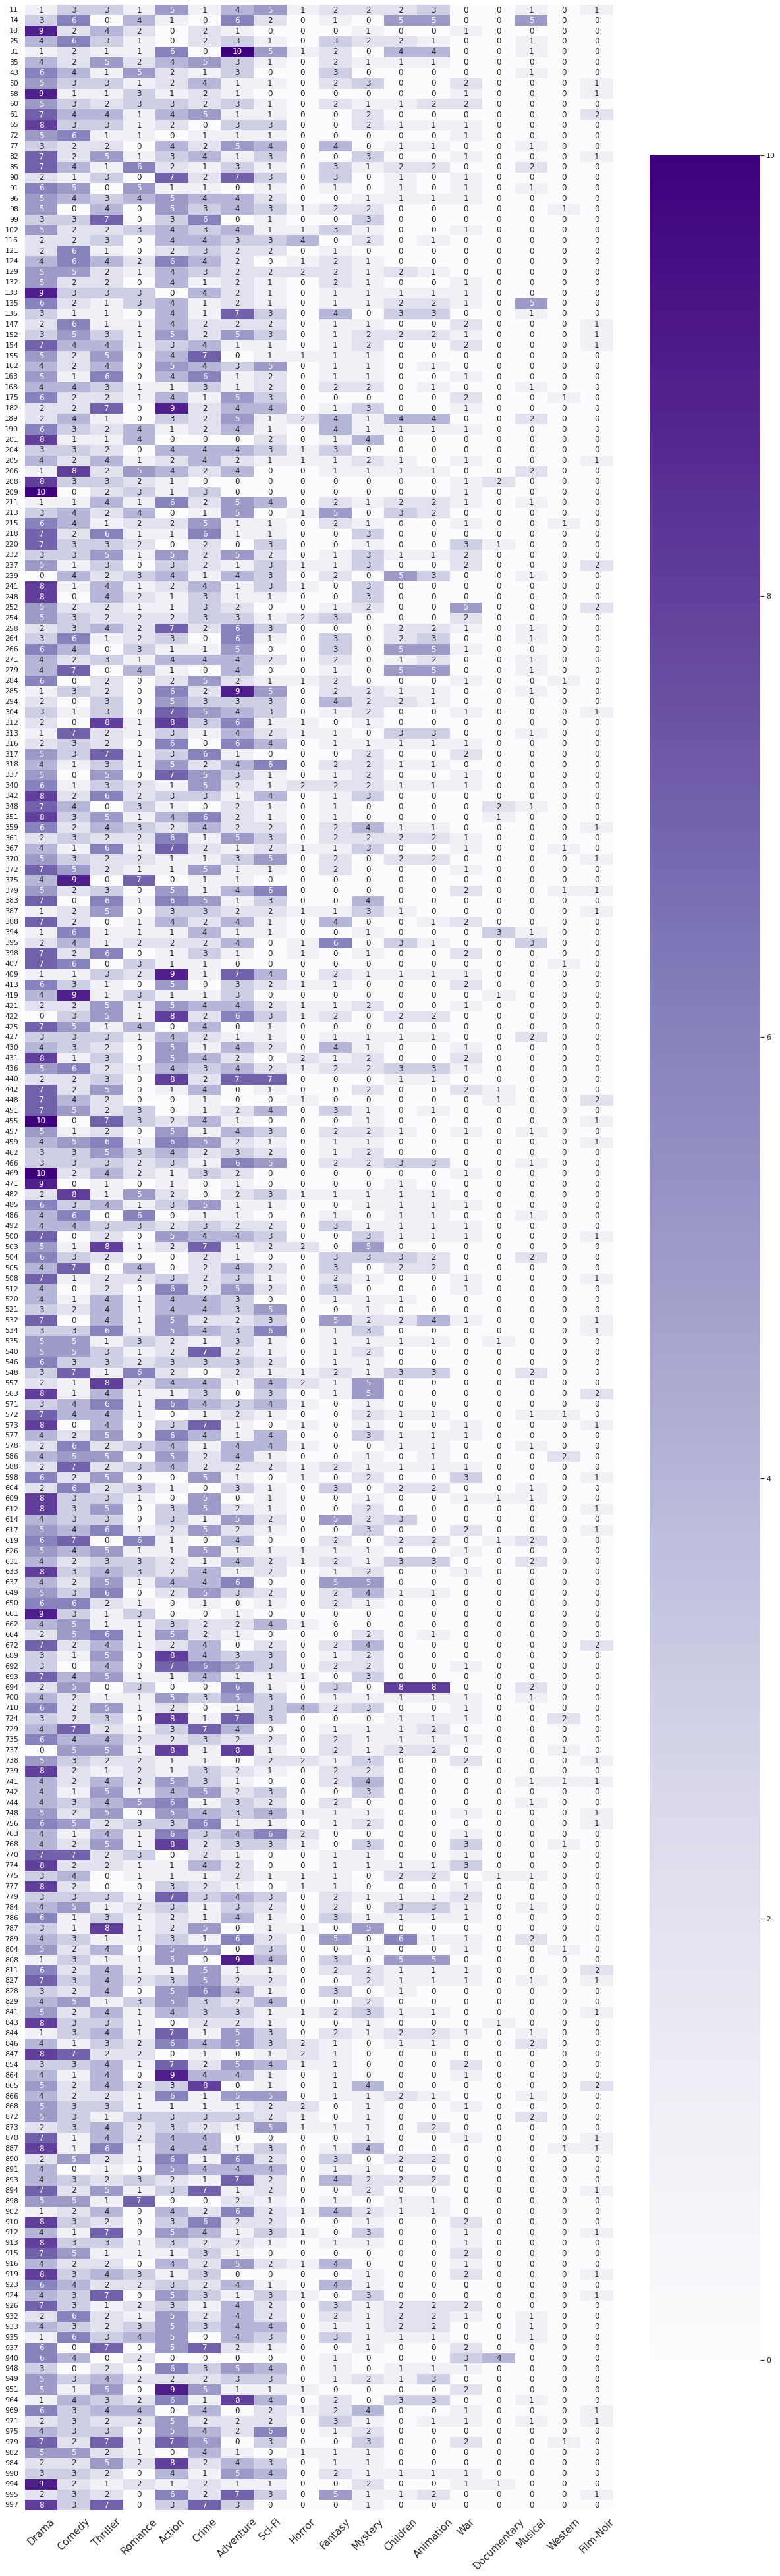

In [217]:
plt.figure(figsize=(20,70))
sns.heatmap(best_user_genre_rec_1000, annot=True, cmap='Purples')
plt.xticks(fontsize=15,rotation=45)
plt.show()

- Action-Adventure, Animation-Children 등 연관 깊은 장르들이 잘 추천되고 있다는 것을 확인할 수 있었다.
- 마니아적인 성격을 가진 War, Documentary, Musical, Western, Film-Noir 등의 장르들의 영화들이 잘 필터링되고 있다는 사실도 알 수 있었다.

## userID < 1000 인 user들에게 추천된 영화들의 개봉 연도

In [174]:
best_user_year

,year
11,"[2001, 1995, 2005, 2005, 1998, 2004, 2005, 200..."
14,"[1989, 1965, 2002, 1971, 1998, 1998, 1964, 197..."
18,"[2008, 2004, 2002, 2006, 1975, 1994, 2000, 200..."
25,"[1985, 1995, 1999, 1996, 1998, 1986, 1990, 197..."
31,"[2004, 2002, 2004, 2004, 2003, 2005, 2009, 200..."
...,...
138473,"[1991, 1994, 2006, 1996, 1994, 2004, 2004, 198..."
138475,"[1946, 1957, 1937, 1953, 1943, 1954, 1928, 193..."
138486,"[1999, 1999, 2002, 1999, 1986, 1991, 1995, 200..."
138492,"[2000, 1986, 1996, 1993, 1978, 1994, 1998, 200..."


In [197]:
year_data.groupby(['year']).size().index

Int64Index([1902, 1915, 1916, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='year', length=101)

In [199]:
yearcount = []
for user in best_user_item_df.index:
    temp = []
    for year in year_data.groupby(['year']).size().index:#list(best_user_genre.loc[user].values[0]):
        temp.append(best_user_year.loc[user].values[0].count(year))
    yearcount.append(temp)


In [200]:
best_user_year_rec = pd.DataFrame(data = yearcount ,index=best_user_genre.index, columns= year_data.groupby(['year']).size().index)

In [210]:
best_user_year_rec_1000 = best_user_year_rec.loc[best_user_year_rec.index < 1000]

In [211]:
best_user_year_rec_1000

year,1902,1915,1916,1917,1919,1920,1921,1922,1923,1924,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
994,0,0,0,0,0,0,0,0,0,0,...,4,1,2,0,0,0,0,0,0,0
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


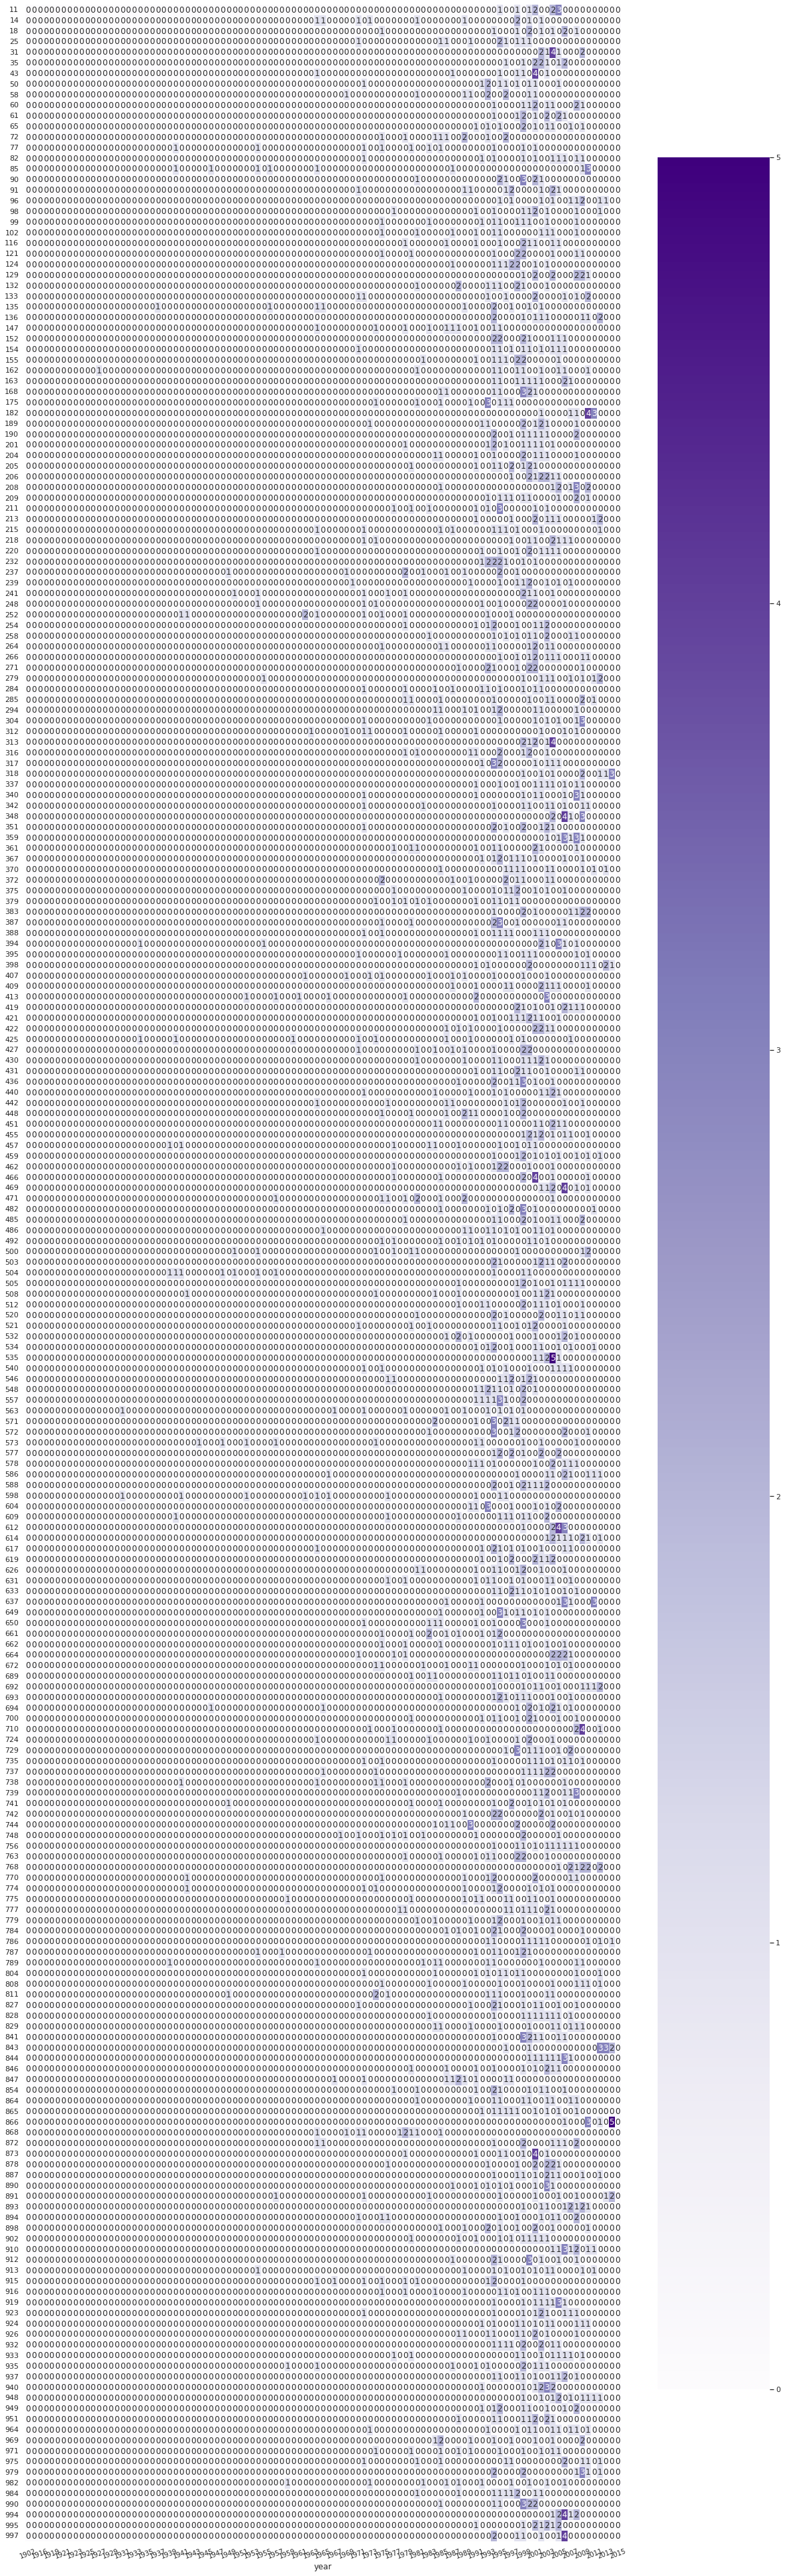

In [218]:
plt.figure(figsize=(20,70))
sns.heatmap(best_user_year_rec_1000, annot=True, cmap='Purples')
plt.xticks(fontsize=10,rotation=20)
plt.show()

- 이미 model에서 각 user마다 다른 분포를 보이며, 비교적 최신 영화들을 잘 추천하고 있다는 것을 알 수 있었다.

In [175]:
best_user_title

,title
11,"[Monsters, Inc. (2001), Seven (a.k.a. Se7en) (..."
14,"[Grand Day Out with Wallace and Gromit, A (198..."
18,"[Slumdog Millionaire (2008), Head-On (Gegen di..."
25,"[Back to the Future (1985), Seven (a.k.a. Se7e..."
31,"[Van Helsing (2004), Scorpion King, The (2002)..."
...,...
138473,"[Silence of the Lambs, The (1991), Forrest Gum..."
138475,"[Notorious (1946), Sweet Smell of Success (195..."
138486,"[Blair Witch Project, The (1999), Fight Club (..."
138492,"[Memento (2000), Ferris Bueller's Day Off (198..."
